In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\Matiks\matiks_new.csv")
df.head()

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score,Active_time
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,38.41,6,27.50,2025-05-19,Silver,Social Media,Co-op,Bronze,8721,155
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,129.02,10,2.50,2025-05-12,Gold,Ads,Solo,Bronze,3572,431
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,...,62.50,5,25.56,2025-05-03,Silver,Organic,Solo,Platinum,1060,562
3,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,2024-08-09,Slovenia,26,Other,PC,QuestRaid,18,...,86.70,6,20.79,2025-04-24,Free,Friend,Multiplayer,Diamond,2666,258
4,dffbc115-7354-4512-87b2-1e685d84a5d2,brian37,kennethherman@gmail.com,2024-04-07,Cape Verde,41,Other,Mobile,BattleZone,25,...,125.28,7,57.89,2025-05-21,Silver,Organic,Solo,Gold,5605,409


In [4]:
df.columns

Index(['User_ID', 'Username', 'Email', 'Signup_Date', 'Country', 'Age',
       'Gender', 'Device_Type', 'Game_Title', 'Total_Play_Sessions',
       'Avg_Session_Duration_Min', 'Total_Hours_Played',
       'In_Game_Purchases_Count', 'Total_Revenue_USD', 'Last_Login',
       'Subscription_Tier', 'Referral_Source', 'Preferred_Game_Mode',
       'Rank_Tier', 'Achievement_Score', 'Active_time'],
      dtype='object')

In [5]:
# Removal of unwanted columns
#user_id,user_name,email,signupdate,last_login,
df.drop(columns= ['Email'],inplace = True)

## Data type conversion:

In [7]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'])

In [8]:
df['Last_Login'] =pd.to_datetime(df['Last_Login'])

In [9]:
df['Year'] = df['Signup_Date'].dt.year

In [10]:
df['Month'] = df['Signup_Date'].dt.month_name()

In [11]:
df['Day'] = df['Signup_Date'].dt.day_name()

In [12]:
df.dtypes

User_ID                             object
Username                            object
Signup_Date                 datetime64[ns]
Country                             object
Age                                  int64
Gender                              object
Device_Type                         object
Game_Title                          object
Total_Play_Sessions                  int64
Avg_Session_Duration_Min           float64
Total_Hours_Played                 float64
In_Game_Purchases_Count              int64
Total_Revenue_USD                  float64
Last_Login                  datetime64[ns]
Subscription_Tier                   object
Referral_Source                     object
Preferred_Game_Mode                 object
Rank_Tier                           object
Achievement_Score                    int64
Active_time                          int64
Year                                 int32
Month                               object
Day                                 object
dtype: obje

## Which users are consistently active across multiple months?

In [ ]:

df.groupby('Month')['Username'].value_counts().reset_index()

,Month,Username,count
0,April,cmorrison,2
1,April,coleedwin,2
2,April,jramos,2
3,April,xgarcia,2
4,April,zmiller,2
...,...,...,...
8857,September,zmartin,1
8858,September,zmclaughlin,1
8859,September,zpennington,1
8860,September,zrodriguez,1


## MAU = Monthly Active users

In [ ]:

mau = df.groupby('Month')['Username'].nunique().reset_index().sort_values(by='Username',ascending=False)
mau.rename(columns={'Username':'MAU'},inplace=True)
mau

,Month,MAU
4,January,797
1,August,780
7,March,765
8,May,758
5,July,748
0,April,739
11,September,733
2,December,729
10,October,706
3,February,703


## Which user is active on which day?

In [ ]:

df.groupby('Day')['Username'].nunique().reset_index().sort_values(by='Username',ascending=False)

,Day,Username
5,Tuesday,1295
2,Saturday,1294
1,Monday,1274
6,Wednesday,1274
3,Sunday,1238
4,Thursday,1238
0,Friday,1214


In [16]:
df['Date'] = df['Signup_Date'].dt.date

In [17]:
df['Date'] = pd.to_datetime(df['Date'],format='%m-%d-%y')

In [18]:
df.groupby(df['Date'].dt.day_name())['Username'].nunique()

Date
Friday       1214
Monday       1274
Saturday     1294
Sunday       1238
Thursday     1238
Tuesday      1295
Wednesday    1274
Name: Username, dtype: int64

## Daily Active users:

In [ ]:

dau = df.groupby('Date')['Username'].nunique().reset_index().sort_values(by='Username',ascending=False)
dau.rename(columns={'Username':'DAU'},inplace=True)
dau

,Date,DAU
169,2023-11-07,25
84,2023-08-14,24
627,2025-02-07,22
282,2024-02-28,22
61,2023-07-22,22
...,...,...
180,2023-11-18,4
174,2023-11-12,4
536,2024-11-08,4
469,2024-09-02,4


In [20]:
df['week'] = df['Signup_Date'].dt.to_period('W').dt.to_timestamp()

In [21]:
df['day'] = df['Signup_Date'].dt.to_period('D').dt.to_timestamp()

In [22]:
df['month'] = df['Signup_Date'].dt.to_period('M').dt.to_timestamp()

In [23]:
df[['month','week','day']]

,month,week,day
0,2024-12-01,2024-12-09,2024-12-15
1,2024-03-01,2024-03-04,2024-03-07
2,2023-10-01,2023-10-16,2023-10-19
3,2024-08-01,2024-08-05,2024-08-09
4,2024-04-01,2024-04-01,2024-04-07
...,...,...,...
8899,2023-06-01,2023-05-29,2023-06-01
8900,2024-07-01,2024-07-01,2024-07-02
8901,2024-03-01,2024-03-11,2024-03-15
8902,2024-12-01,2024-12-09,2024-12-09


In [24]:
df.groupby('Month')['Username'].count().reset_index()

,Month,Username
0,April,744
1,August,783
2,December,732
3,February,707
4,January,799
5,July,751
6,June,705
7,March,768
8,May,762
9,November,706


## WAU -Weekly Active users

In [ ]:


wau = df.groupby('week')['Username'].nunique().reset_index().sort_values(by='Username',ascending=False)
wau.rename(columns={'week':'Week','Username':'WAU'},inplace=True)
wau


,Week,WAU
29,2023-12-11,111
8,2023-07-17,105
59,2024-07-08,104
97,2025-03-31,101
58,2024-07-01,101
...,...,...
21,2023-10-16,65
10,2023-07-31,65
31,2023-12-25,64
23,2023-10-30,60


In [26]:
def get_year(x):
    return x.strftime("%Y")

In [27]:
df['new_year'] = df['Signup_Date'].apply(lambda x:get_year(x))

## Revenue_summary by each user

In [ ]:

summary = df.pivot_table(index='Username',columns='Subscription_Tier',values='Total_Revenue_USD',aggfunc='sum')
summary

Subscription_Tier,Free,Gold,Platinum,Silver
Username,,,,
aanderson,11.87,NaN,NaN,1.06
aandrade,79.01,NaN,NaN,NaN
aaron12,NaN,NaN,98.95,NaN
aaron78,35.59,NaN,NaN,NaN
aaronallen,NaN,33.19,NaN,NaN
...,...,...,...,...
zwalters,NaN,NaN,14.33,NaN
zweaver,6.92,NaN,NaN,NaN
zwhite,18.81,NaN,NaN,NaN


In [29]:
res = pd.crosstab(df['Username'],df['Gender'])
res.sample(5)

Gender,Female,Male,Other
Username,,,
jacksonkayla,0,0,1
foxcheryl,0,0,1
lunamelanie,0,0,1
brussell,0,0,1
zjefferson,0,0,1


## Userwise Revenue

In [ ]:

rev_sum = df.groupby('Username')['Total_Revenue_USD'].sum().reset_index().sort_values(by='Total_Revenue_USD',ascending=False)
rev_sum

,Username,Total_Revenue_USD
6048,pjones,305.09
3201,ismith,298.89
2325,fgonzalez,276.12
3962,jsmith,243.59
7832,vjohnson,242.52
...,...,...
4725,lpeterson,0.01
2456,gabriella79,0.01
2024,dunnrandy,0.01
6143,qestrada,0.01


In [31]:
rev_sum['Class'] = rev_sum['Total_Revenue_USD'].apply(lambda x:'Premium' if x >= 100 else 'Middle' if x >=50 else 'Low')

In [32]:
rev_sum

,Username,Total_Revenue_USD,Class
6048,pjones,305.09,Premium
3201,ismith,298.89,Premium
2325,fgonzalez,276.12,Premium
3962,jsmith,243.59,Premium
7832,vjohnson,242.52,Premium
...,...,...,...
4725,lpeterson,0.01,Low
2456,gabriella79,0.01,Low
2024,dunnrandy,0.01,Low
6143,qestrada,0.01,Low


## Count of customer class:

In [ ]:

rev_sum['Class'].value_counts().reset_index()

,Class,count
0,Low,5643
1,Middle,2163
2,Premium,632


## Breakdowns by device type, user segment, or game mode:

In [ ]:

df_breakdown = df[['Device_Type','Subscription_Tier','Preferred_Game_Mode']].value_counts().reset_index(name='User_count').sort_values(by='User_count',ascending=False)
df_breakdown

,Device_Type,Subscription_Tier,Preferred_Game_Mode,User_count
0,PC,Gold,Co-op,297
1,Console,Gold,Co-op,279
2,Console,Free,Multiplayer,278
3,Console,Free,Solo,272
4,Console,Gold,Multiplayer,271
5,Console,Silver,Solo,271
6,PC,Platinum,Co-op,263
7,Mobile,Free,Multiplayer,260
8,Mobile,Silver,Solo,260
9,Mobile,Gold,Multiplayer,259


In [35]:
df_breakdown.groupby('Subscription_Tier')['User_count'].sum().reset_index(name='User_count').sort_values(by='User_count',ascending=False)


,Subscription_Tier,User_count
1,Gold,2258
0,Free,2254
3,Silver,2244
2,Platinum,2148


## Behavioral patterns (e.g., active days, usage frequency)

In [ ]:
df.head(2)

,User_ID,Username,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,...,Achievement_Score,Active_time,Year,Month,Day,Date,week,day,month,new_year
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,5.78,...,8721,155,2024,December,Sunday,2024-12-15,2024-12-09,2024-12-15,2024-12-01,2024
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,32.53,...,3572,431,2024,March,Thursday,2024-03-07,2024-03-04,2024-03-07,2024-03-01,2024


## Active days

In [ ]:
df[['Username','Active_time']].sort_values(by='Active_time',ascending=False)

,Username,Active_time
733,desiree95,729
2620,santosshaun,728
3280,kayla42,728
7824,hsullivan,727
6593,dianabailey,726
...,...,...
8439,qburns,-26
7160,kbrown,-27
6540,egarrett,-27
670,ymoses,-29


## Usage frequency

In [ ]:
df['Active_days'] = df['Active_time']+1
df['Active_days']

0       156
1       432
2       563
3       259
4       410
       ... 
8899    713
8900    302
8901    404
8902    162
8903    604
Name: Active_days, Length: 8904, dtype: int64

## Sessions per day

In [ ]:
df['Sessions_per_day'] = df['Total_Play_Sessions']/df['Active_days']

## Sessions per week

In [ ]:
df['Sessions_per_week'] = df['Total_Play_Sessions']/(df['Active_days']/7)

## Sessions per month

In [ ]:
df['Sessions_per_month'] = df['Total_Play_Sessions']/(df['Active_days']/30)

In [42]:
def frequency_segment(sessions_per_day):
    if sessions_per_day >= 1:
        return 'Daily'
    elif sessions_per_day >= 0.2:
        return 'Weekly'
    elif sessions_per_day > 0:
        return 'Occasional'
    else:
        return 'Inactive'

In [43]:
df['usage_segment'] = df['Sessions_per_day'].apply(frequency_segment)

## Usage frequency

In [ ]:
df['usage_segment'].value_counts().reset_index()

,usage_segment,count
0,Occasional,7466
1,Weekly,1026
2,Daily,255
3,Inactive,157


## Early signs of churn (e.g., time gaps, short session users)

In [ ]:
## Bundle up all the possible factors
df['churn_risk'] = (
    (df['Active_days'] <= 3) |
    (df['Total_Play_Sessions'] <= 2) |
    (df['Sessions_per_day'] < 0.2) |
    (df['Avg_Session_Duration_Min'] < 5) |
    (df['Total_Revenue_USD'] == 0)
)


In [46]:
df['churn_risk'].value_counts().reset_index()

,churn_risk,count
0,True,7676
1,False,1228


In [47]:
df.groupby(['Device_Type', 'churn_risk']).size().unstack()

churn_risk,False,True
Device_Type,,
Console,425,2605
Mobile,385,2549
PC,418,2522


In [48]:
df.groupby(['Subscription_Tier', 'churn_risk']).size().unstack()

churn_risk,False,True
Subscription_Tier,,
Free,341,1913
Gold,311,1947
Platinum,274,1874
Silver,302,1942


In [49]:
df.groupby(['Preferred_Game_Mode', 'churn_risk']).size().unstack()

churn_risk,False,True
Preferred_Game_Mode,,
Co-op,391,2589
Multiplayer,457,2554
Solo,380,2533


In [51]:
df['High_value_customers'] = rev_sum[rev_sum['Class'] == 'Premium']['Class']

In [53]:
df['High_value_customers'].count()

632

# Revenue Trends Over Time

In [139]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

In [140]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [54]:
def year_revenue(df):
    year_df = df.groupby('Year')['Total_Revenue_USD'].sum().reset_index()
    return year_df

In [55]:
year_revenue(df)

,Year,Total_Revenue_USD
0,2023,103982.79
1,2024,175690.69
2,2025,69192.09


In [133]:
def year_rev_plot(df):
    year_df = df.groupby('Year')['Total_Revenue_USD'].sum().reset_index()
    yr = year_df['Year'].tolist()
    rev = year_df['Total_Revenue_USD'].tolist()
    fig = sns.barplot(data=year_df,x=yr,y=rev,hue='Year',legend=False)
    plt.title('Yearwise Revenue')
    plt.show()
    return fig

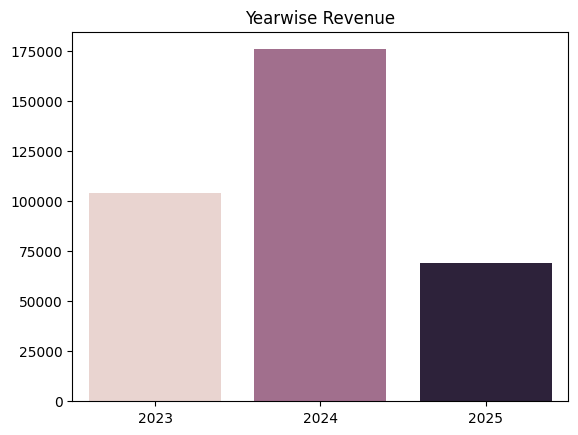

<Axes: title={'center': 'Yearwise Revenue'}>

In [134]:
year_rev_plot(df)

In [142]:
df['Month'] = pd.Categorical(df['Month'],categories=month_order,ordered=True)

In [143]:
def month_revenue(df):
    month_df = df.groupby('Month')['Total_Revenue_USD'].sum().reset_index()
    return month_df

In [151]:
month_revenue(df)

,Month,Total_Revenue_USD
0,January,31324.32
1,February,27641.28
2,March,29853.70
3,April,29987.63
4,May,28317.81
5,June,26371.67
6,July,30393.80
7,August,30083.22
8,September,30295.99
9,October,27828.34


In [156]:
def month_rev_plot(df):
    mnth = month_revenue(df)['Month'].tolist()
    rev = month_revenue(df)['Total_Revenue_USD'].tolist()
    fig = sns.barplot(data = month_revenue(df),x=mnth,y=rev,hue=mnth,legend=False)
    plt.xticks(rotation=90)
    plt.title('Monthwise Revenue')
    plt.show()
    return fig


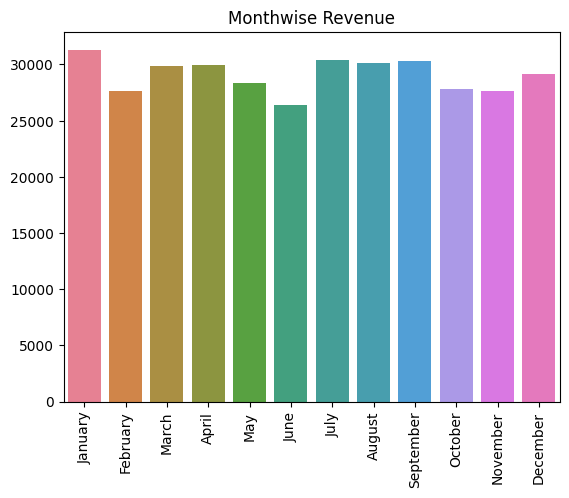

<Axes: title={'center': 'Monthwise Revenue'}>

In [157]:
month_rev_plot(df)

In [163]:
df['Day'] = pd.Categorical(df['Day'],categories=weekday_order,ordered=True)

In [164]:
def day_revenue(df):
    day_df = df.groupby('Day')['Total_Revenue_USD'].sum().reset_index()
    return day_df

In [165]:
day_revenue(df)

,Day,Total_Revenue_USD
0,Monday,50949.58
1,Tuesday,51446.33
2,Wednesday,49406.94
3,Thursday,48394.81
4,Friday,49706.68
5,Saturday,51402.69
6,Sunday,47558.54


In [166]:
def day_revenue_plot(df):
    day_df = df.groupby('Day')['Total_Revenue_USD'].sum().reset_index()
    dy = day_df['Day'].tolist()
    rev = day_df['Total_Revenue_USD'].tolist()
    fig = sns.barplot(data = day_df,x=dy,y=rev,hue=dy,legend=False)
    plt.xticks(rotation=90)
    plt.title('Daywise Revenue')
    plt.show()
    return fig
          

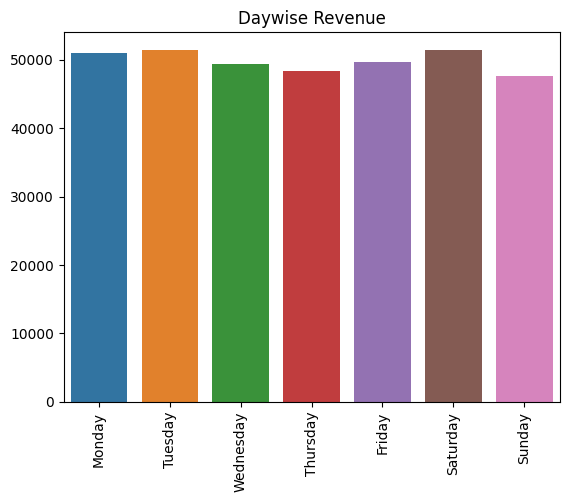

<Axes: title={'center': 'Daywise Revenue'}>

In [167]:
day_revenue_plot(df)

## DAU - Daily Active Users:

In [172]:
def get_dau(df):
    dau = df.groupby('Day')['Username'].count().reset_index()
    return dau

In [173]:
get_dau(df)

,Day,Username
0,Monday,1292
1,Tuesday,1306
2,Wednesday,1285
3,Thursday,1246
4,Friday,1221
5,Saturday,1304
6,Sunday,1250


In [174]:
def dau_plot(df):
    dau = df.groupby('Day')['Username'].count().reset_index()
    day = dau['Day'].tolist()
    user = dau['Username'].tolist()
    user.sort()
    sns.lineplot(data=dau,x=day,y=user)
    plt.show()
    

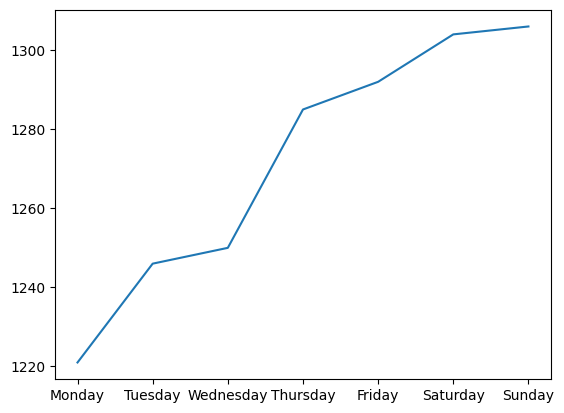

In [175]:
dau_plot(df)

# MAU - Monthly Active Users:

In [176]:
def get_mau(df):
    mau = df.groupby('Month')['Username'].count().reset_index()
    mau.rename(columns={'Username':'MAU'},inplace=True)
    return mau

In [177]:
get_mau(df)

,Month,MAU
0,January,799
1,February,707
2,March,768
3,April,744
4,May,762
5,June,705
6,July,751
7,August,783
8,September,737
9,October,710


In [178]:
def mau_plot(df):
    mau = df.groupby('Month')['Username'].count().reset_index()
    mau.rename(columns={'Username':'MAU'},inplace=True)
    mnth = mau['Month'].tolist()
    user = mau['MAU'].tolist()
    sns.lineplot(data = mau,x=mnth,y=user)
    plt.xticks(rotation=90)
    plt.title('Monthly Active Users')
    plt.show()
    

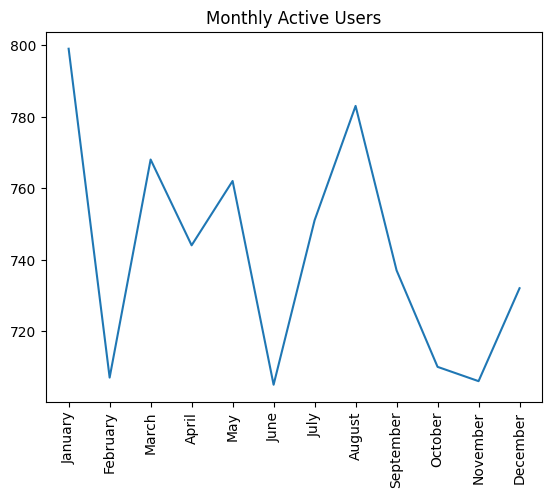

In [179]:
mau_plot(df)

# Userwise Revenue:

In [180]:
user_rev_df = df.groupby('Username')['Total_Revenue_USD'].sum().reset_index().sort_values(by='Total_Revenue_USD',ascending=False)
user_rev_df

,Username,Total_Revenue_USD
6048,pjones,305.09
3201,ismith,298.89
2325,fgonzalez,276.12
3962,jsmith,243.59
7832,vjohnson,242.52
...,...,...
4725,lpeterson,0.01
2456,gabriella79,0.01
2024,dunnrandy,0.01
6143,qestrada,0.01


## Countrywise Revenue:

In [181]:
country_rev_df = df.groupby('Country')['Total_Revenue_USD'].sum().reset_index().sort_values(by='Total_Revenue_USD',ascending=False)
country_rev_df

,Country,Total_Revenue_USD
80,Ghana,2759.73
114,Korea,2560.06
49,Congo,2504.24
134,Marshall Islands,2339.13
0,Afghanistan,2179.44
...,...,...
34,Burkina Faso,839.37
113,Kiribati,833.83
99,India,813.38
137,Mauritius,797.87


## Count of Customer Class:

In [90]:
def cls_count(df):
    cls_df = rev_sum['Class'].value_counts().reset_index()
    cls_df.rename(columns={'count':'Count'},inplace = True)
    return cls_df

In [91]:
cls_count(df)

,Class,Count
0,Low,5643
1,Middle,2163
2,Premium,632


In [96]:
def custmer_cls_plt(df):
    classes = cls_count(df)['Class'].tolist()
    values = cls_count(df)['Count'].tolist()
    explod = [0,0,0.2]
    plt.pie(values,labels=classes,explode=explod,autopct='%1.1f%%');
    plt.title('Customer Classification based on Revenue by customer')
    plt.show()
    

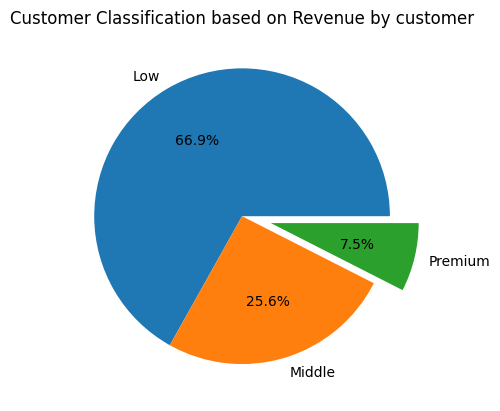

In [97]:
custmer_cls_plt(df)

# Breakdowns by device type, user segment, or game mode:

In [98]:
def break_down(df):
    df_breakdown = df[['Device_Type','Subscription_Tier','Preferred_Game_Mode']].value_counts().reset_index(name='User_count').sort_values(by='User_count',ascending=False)
    return df_breakdown

In [99]:
break_down(df)

,Device_Type,Subscription_Tier,Preferred_Game_Mode,User_count
0,PC,Gold,Co-op,297
1,Console,Gold,Co-op,279
2,Console,Free,Multiplayer,278
3,Console,Free,Solo,272
4,Console,Gold,Multiplayer,271
5,Console,Silver,Solo,271
6,PC,Platinum,Co-op,263
7,Mobile,Free,Multiplayer,260
8,Mobile,Silver,Solo,260
9,Mobile,Gold,Multiplayer,259


# Subscription Classification:

In [100]:
def sub_cls(df):
    sub_cls_df = df_breakdown.groupby('Subscription_Tier')['User_count'].sum().reset_index(name='User_count').sort_values(by='User_count',ascending=False)
    return sub_cls_df

In [101]:
sub_cls(df)

,Subscription_Tier,User_count
1,Gold,2258
0,Free,2254
3,Silver,2244
2,Platinum,2148


In [102]:
def sub_cls_plot(df):
    sub_count = sub_cls(df)['Subscription_Tier'].tolist()
    values = sub_cls(df)['User_count'].tolist()
    explod = [0,0,0,0.2]
    plt.pie(values,labels=sub_count,explode=explod,autopct='%1.1f%%')
    plt.title('Customer Classfication based on Subscription')
    plt.show()

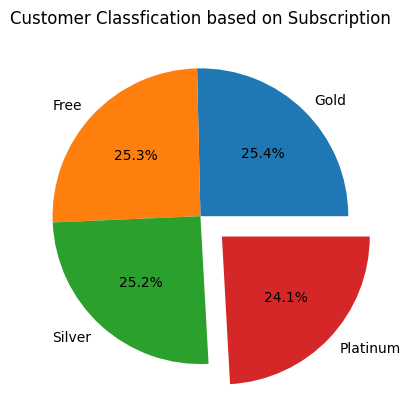

In [103]:
sub_cls_plot(df)

# Active Days:

In [104]:
def active_days(df):
    act_days_df = df[['Username','Active_time']].sort_values(by='Active_time',ascending=False)
    return act_days_df

In [106]:
active_days(df)

,Username,Active_time
733,desiree95,729
2620,santosshaun,728
3280,kayla42,728
7824,hsullivan,727
6593,dianabailey,726
...,...,...
8439,qburns,-26
7160,kbrown,-27
6540,egarrett,-27
670,ymoses,-29


# Usage Frquency:

In [107]:
def usage_freq(df):
    usage_freq_df = df['usage_segment'].value_counts().reset_index()
    return usage_freq_df

In [108]:
usage_freq(df)

,usage_segment,count
0,Occasional,7466
1,Weekly,1026
2,Daily,255
3,Inactive,157


In [109]:
def usage_freq_plot(df):
    sns.barplot(data=usage_freq(df),x='usage_segment',y='count',hue='usage_segment')
    plt.title('Usage Frequency')
    plt.show()

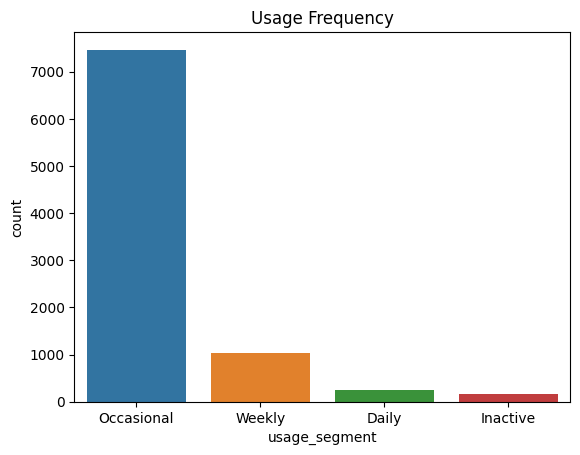

In [110]:
usage_freq_plot(df)

# Churnrisk customers Count:

In [111]:
def churn_data(df):
    churn_df = df['churn_risk'].value_counts().reset_index()
    return churn_df

In [112]:
churn_data(df)

,churn_risk,count
0,True,7676
1,False,1228


In [113]:
def churn_risk_plot(df):
    sns.barplot(data=churn_data(df),x='churn_risk',y='count',hue='churn_risk',legend=False)
    plt.title('Churn_risk Customers Count')
    plt.show()

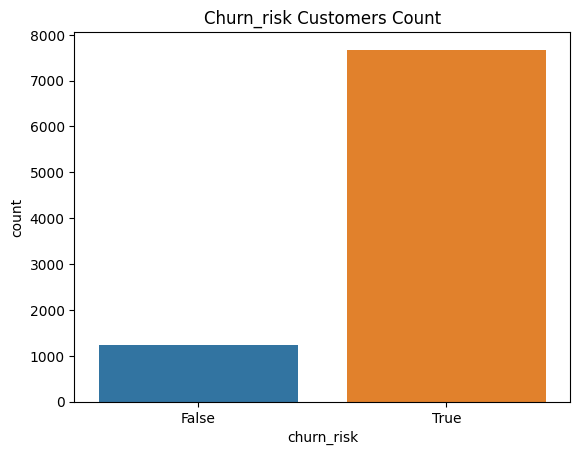

In [114]:
churn_risk_plot(df)

# Subscriptionwise Churnrisk:

In [115]:
def sub_churn_risk(df):
    sub_churn_df = df.groupby(['Subscription_Tier','churn_risk']).size().unstack()
    return sub_churn_df

In [116]:
sub_churn_risk(df)

churn_risk,False,True
Subscription_Tier,,
Free,341,1913
Gold,311,1947
Platinum,274,1874
Silver,302,1942


In [117]:
sub_churn_df = df.groupby(['Subscription_Tier','churn_risk']).size().unstack()
sub_churn_df

churn_risk,False,True
Subscription_Tier,,
Free,341,1913
Gold,311,1947
Platinum,274,1874
Silver,302,1942


In [121]:
def sub_wise_churn_risk_plot(df):
    sub_churn_risk(df).plot(kind='bar')
    plt.title('Subscriptionwise Churn_risk')
    plt.show()

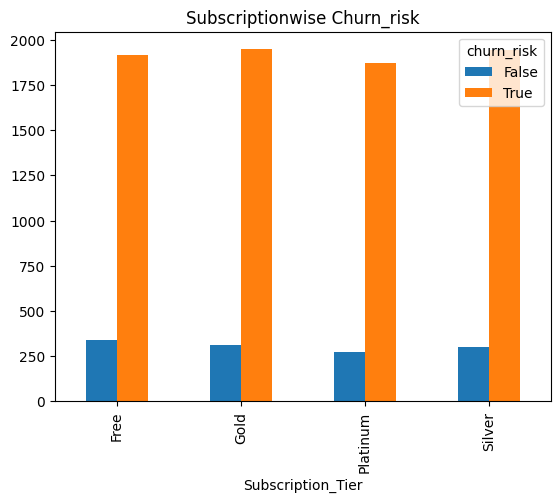

In [122]:
sub_wise_churn_risk_plot(df)

# Device_type Churn_risk:

In [123]:
def device_churn_risk(df):
    device_df = df.groupby(['Device_Type', 'churn_risk']).size().unstack()
    return device_df

In [124]:
device_churn_risk(df)

churn_risk,False,True
Device_Type,,
Console,425,2605
Mobile,385,2549
PC,418,2522


In [125]:
def device_churn_risk_plot(df):
    device_churn_risk(df).plot(kind='bar')
    plt.title('Devicetype Churn_risk')
    plt.show()

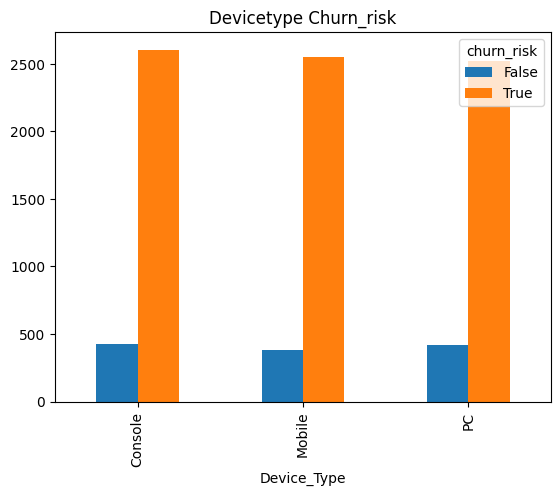

In [126]:
device_churn_risk_plot(df)

# Game_mode Churn_risk:

In [127]:
def game_churn_risk(df):
    game_churn_df = df.groupby(['Preferred_Game_Mode', 'churn_risk']).size().unstack()
    return game_churn_df

In [128]:
game_churn_risk(df)

churn_risk,False,True
Preferred_Game_Mode,,
Co-op,391,2589
Multiplayer,457,2554
Solo,380,2533


In [129]:
def game_churn_plot(df):
    game_churn_risk(df).plot(kind='bar')
    plt.title('Game_mode Churn_risk')
    plt.show()

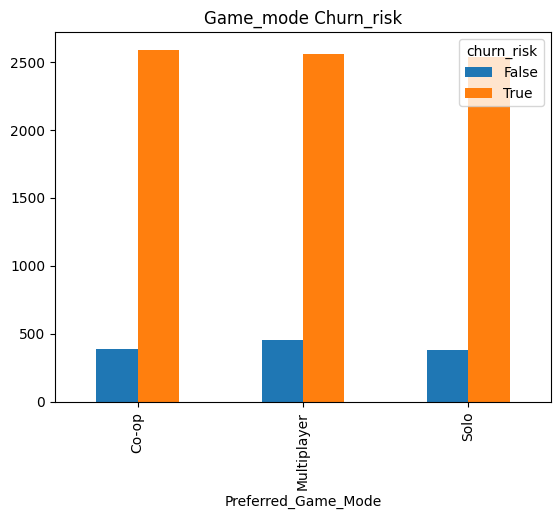

In [130]:
game_churn_plot(df)